In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
GRVTY = 9.8

def horiz_dist(v0,t,deg):
  rad = np.radians(deg) 
  v_horiz = v0 * np.cos(rad)
  dist = v_horiz * t
  return dist

def vert_dist(v0,t,deg):
  rad = np.radians(deg) 
  v_vert = v0 * np.sin(rad)
  h = v_vert * t - (0.5 * GRVTY * t * t)
  if h >= 0:  
    return h
  else:
    return 0

def ground_t(v0,deg):
  rad = np.radians(deg) 
  v_vert = v0 * np.sin(rad)
  t = 2 * v_vert / GRVTY
  return t

vec_hdist = np.vectorize(horiz_dist)
vec_vdist = np.vectorize(vert_dist)

In [3]:
v0 = 100
deg = 60
dlt = 0.1
t_ground = ground_t(v0,deg)
t_steps = np.arange(0,t_ground+dlt,dlt)
s_l = vec_hdist(v0,t_steps,deg)
h_l = vec_vdist(v0,t_steps,deg)
s_max = max(s_l) + 0.10 * (max(s_l))
h_max = max(h_l) + 0.10 * (max(h_l))

<IPython.core.display.Javascript object>


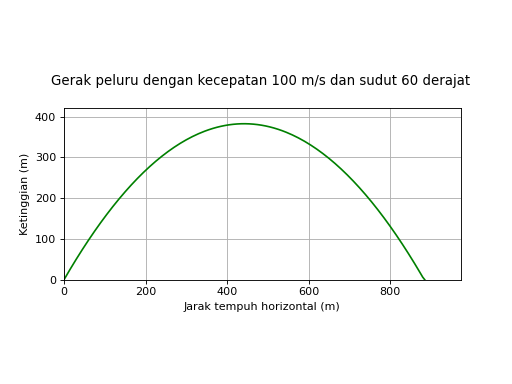

In [4]:
fig, ax = plt.subplots()
plt.gca().set_aspect("equal")
plt.title('Gerak peluru dengan kecepatan {} m/s dan sudut {} derajat \n'.format(v0,deg)) # judul grafik
plt.xlabel('Jarak tempuh horizontal (m)') # judul sumbu x
plt.ylabel('Ketinggian (m)') # judul sumbu y
plt.grid(True, which='both') # tampilkan grid/kotak-kotak


line, = ax.plot(s_l, h_l, color='g')

def update(num, s_l, h_l, line):
    line.set_data(s_l[:num], h_l[:num])
    line.axes.axis([0, s_max, 0, h_max])
    return line,

ani = animation.FuncAnimation(fig, update, fargs=[s_l, h_l, line],interval=3)
ani.save('projectile.gif', writer='imagemagick', fps=30)

#FFwriter = animation.FFMpegWriter(fps=10)
#ani.save('anim/projectile.mp4', writer=FFwriter)